In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from pathlib import Path
from PIL import Image

In [2]:
#DIRECTORIO ACTUAL DEL CÓDIGO
dir= os.getcwd()
print ("El directorio actual es:", dir)

El directorio actual es: C:\Users\gabo2\Desktop\Hurrican\CODE


# VISULAZIACIÓN DE DATOS 

## TRAIN

### No_Dam_df

In [3]:
#DATAFRAME NO DAÑADO
in_t_path='C:\\Users\gabo2\Desktop\Hurrican/DATASET/TRAIN/'
No_Dam_df = pd.DataFrame({'path': list(Path(in_t_path).glob('NO_DAMAGE/*.jpeg'))}) #crear tabla 
#ND_train
No_Dam_df['label'] = No_Dam_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
No_Dam_df['name'] = No_Dam_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
No_Dam_df['lon'] =No_Dam_df['name'].map(lambda x: float(x.split('_')[0]))
No_Dam_df['lat'] = No_Dam_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
No_Dam_df['path'] = No_Dam_df['path'].map(lambda x: str(x)) # convert the path back to a string
#No_Dam_df.head(len(No_Dam_df))

### Dam_df

In [4]:
#DATAFRAME DAÑADO
Dam_df = pd.DataFrame({'path': list(Path(in_t_path).glob('DAMAGE/*.jpeg'))}) #crear tabla 
#D_train
#damage_df['sub_carp'] = damage_df['path'].map(lambda x: x.parent.parent.parent.stem)
#damage_df['data_split'] = damage_df['path'].map(lambda x: x.parent.parent.stem)
Dam_df['label'] = Dam_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
Dam_df['name'] = Dam_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
Dam_df['lon'] = Dam_df['name'].map(lambda x: float(x.split('_')[0]))
Dam_df['lat'] = Dam_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
Dam_df['path'] = Dam_df['path'].map(lambda x: str(x)) # convert the path back to a string
#Dam_df.head(len(Dam_df))

### mask_df

In [5]:
#DATAFRAME DAÑADO
mask_df = pd.DataFrame({'path': list(Path(in_t_path).glob('MASK/*.JPEG'))}) #crear tabla 
mask_df['label'] = mask_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
mask_df['name'] = mask_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
mask_df['lon'] = mask_df['name'].map(lambda x: float(x.split('_')[0]))
mask_df['lat'] = mask_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
mask_df['path'] = mask_df['path'].map(lambda x: str(x)) # convert the path back to a string
#mask_df.head(len(mask_df))

## TEST 

### ND_t_df

In [6]:
#DATAFRAME NO DAÑADO
in_te_path='C:\\Users\gabo2\Desktop\Hurrican/DATASET/TEST/'
ND_t_df = pd.DataFrame({'path': list(Path(in_te_path).glob('NO_DAMAGE/*.jpeg'))}) #crear tabla 
#ND_train
ND_t_df['label'] = ND_t_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
ND_t_df['name'] = ND_t_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
ND_t_df['lon'] =ND_t_df['name'].map(lambda x: float(x.split('_')[0]))
ND_t_df['lat'] = ND_t_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
ND_t_df['path'] = ND_t_df['path'].map(lambda x: str(x)) # convert the path back to a string
#No_Dam_df.head(len(ND_t_df))

### D_t_df

In [7]:
D_t_df = pd.DataFrame({'path': list(Path(in_te_path).glob('DAMAGE/*.jpeg'))}) #crear tabla 
#ND_train
D_t_df['label'] = D_t_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
D_t_df['name'] = D_t_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
D_t_df['lon'] =D_t_df['name'].map(lambda x: float(x.split('_')[0]))
D_t_df['lat'] = D_t_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
D_t_df['path'] = D_t_df['path'].map(lambda x: str(x)) # convert the path back to a string
#No_Dam_df.head(len(D_t_df))

### M_t_df

In [8]:
M_t_df = pd.DataFrame({'path': list(Path(in_te_path).glob('MASK/*.jpeg'))}) #crear tabla 
#ND_train
M_t_df['label'] = M_t_df['path'].map(lambda x: x.parent.stem) # .paretn devuelve directorio principal de una ruta dada
M_t_df['name'] = M_t_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
M_t_df['lon'] =M_t_df['name'].map(lambda x: float(x.split('_')[0]))
M_t_df['lat'] = M_t_df['name'].map(lambda x: float(x.split('_')[-1])) #debe estar menor uno y arrojar latitud 
M_t_df['path'] = M_t_df['path'].map(lambda x: str(x)) # convert the path back to a string
#No_Dam_df.head(len(M_t_df))

# CREAR DATAFRAME DE TRIPLETAS DE PATHS DE IMÁGENES: NO_DAMAGE , DAMAGE Y MASK

## TRAIN DATAFRAME

In [9]:
#####TRAIN
#######NO_DAMAGE
NDTr_Paths= np.array(No_Dam_df['path'])
NDTr_name= np.array(No_Dam_df['name'])
#######DAMAGE
DTr_Paths= np.array(Dam_df['path'])
DTr_name= np.array(Dam_df['name'])
#######MASK
MTr_Paths= np.array(mask_df['path'])
MTr_name= np.array(mask_df['name'])
# CREAR DATAFRAME
data_train={'DAMAGE':DTr_Paths,'NO_DAMAGE': NDTr_Paths, 'MASK':MTr_Paths}
      #'NAME_D':DTr_name,'NAME_ND': NDTr_name, 'NAME_M':MTr_name}
df_pair_train=pd.DataFrame(data_train)
#df_pair_train.head(len(df_pair_train))


In [10]:
print(df_pair_train['NO_DAMAGE'][1])
print(df_pair_train['DAMAGE'][1])
print(df_pair_train['MASK'][1])

C:\Users\gabo2\Desktop\Hurrican\DATASET\TRAIN\NO_DAMAGE\-95.06354_30.007773999999998.jpeg
C:\Users\gabo2\Desktop\Hurrican\DATASET\TRAIN\DAMAGE\-95.06354_30.007773999999998.jpeg
C:\Users\gabo2\Desktop\Hurrican\DATASET\TRAIN\MASK\-95.06354_30.007773999999998.jpeg


## TEST DATAFRAME

In [11]:
########TEST
#######NO_DAMAGE
NDt_Paths= np.array(ND_t_df['path'])
NDt_name= np.array(ND_t_df['name'])
#######DAMAGE
#print("Los directorios de imágenes dañadas son:",)
Dt_Paths= np.array(D_t_df['path'])
Dt_name= np.array(D_t_df['name'])
#######MASK
Mt_Paths= np.array(M_t_df['path'])
Mt_name= np.array(M_t_df['name'])
# CREAR DATAFRAME
data_test={'NO_DAMAGE': NDt_Paths,'DAMAGE':Dt_Paths,'MASK':Mt_Paths,#}
      'NAME_D':Dt_name,'NAME_ND': NDt_name,'NAME_M':Mt_name}
df_pair_test=pd.DataFrame(data_test)
#df_pair_test.head(len(df_pair_test))

In [12]:
print(df_pair_test['NO_DAMAGE'][1])
print(df_pair_test['DAMAGE'][1])
print(df_pair_test['MASK'][1])

C:\Users\gabo2\Desktop\Hurrican\DATASET\TEST\NO_DAMAGE\-95.0703_29.830614.jpeg
C:\Users\gabo2\Desktop\Hurrican\DATASET\TEST\DAMAGE\-95.0703_29.830614.jpeg
C:\Users\gabo2\Desktop\Hurrican\DATASET\TEST\MASK\-95.0703_29.830614.jpeg


# VISUALIZAR DATOS 

## MOSTRAR DISTRIBUCIÓN ESPACIAL DE IMÁGENES, POR DIVISIÓN Y ETIQUETAS

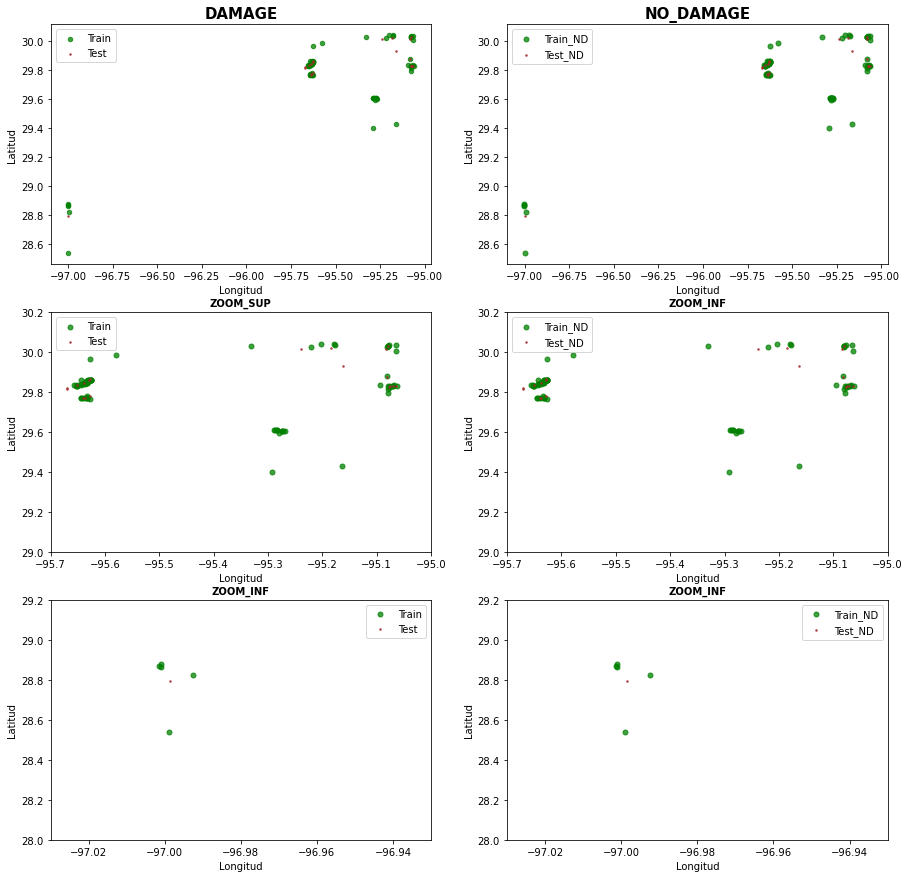

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15)) #MATRIZ DE GRAFICAS
alpha = 0.75 #opacidad 

# DAMAGE
#Copiar imágenes por división train y test 
image_d_train = Dam_df[Dam_df['label']=='DAMAGE'].copy()
image_d_test = D_t_df[D_t_df['label']=='DAMAGE'].copy()
# ordenar variables DAMAGE
image_d_train.sort_values('lat', inplace=True)
image_d_test.sort_values('lat', inplace=True)
image_d_train.reset_index(drop=True,inplace=True)
image_d_test.reset_index(drop=True,inplace=True)
# CONFIGURAR PLOT
ax[0,0].scatter(image_d_train['lon'], image_d_train['lat'], color='green', s=20, alpha=alpha, label='Train', marker= "o")
ax[0,0].scatter(image_d_test['lon'], image_d_test['lat'], color='brown', s=10, alpha=alpha, label='Test', marker= ".")
ax[0,0].set_title('DAMAGE', fontsize=15, fontweight='bold')
ax[0,0].legend()
ax[0,0].set_xlabel('Longitud')
ax[0,0].set_ylabel('Latitud')


# DAMAGE ZOOM SUPERIOR

ax[1,0].scatter(image_d_train['lon'], image_d_train['lat'], color='green', s=25, alpha=alpha, label='Train', marker= "o")
ax[1,0].scatter(image_d_test['lon'], image_d_test['lat'], color='brown', s=10, alpha=alpha, label='Test', marker= ".")
ax[1,0].set_title('ZOOM_SUP', fontsize=10, fontweight='bold')
ax[1,0].legend()
ax[1,0].set_xlabel('Longitud')
ax[1,0].set_ylabel('Latitud')
ax[1,0].set_xlim(-95.7,-95)
ax[1,0].set_ylim(29,30.2)

# DAMAGE ZOOM INFERIOR

ax[2,0].scatter(image_d_train['lon'], image_d_train['lat'], color='green', s=25, alpha=alpha, label='Train', marker= "o")
ax[2,0].scatter(image_d_test['lon'], image_d_test['lat'], color='brown', s=10, alpha=alpha, label='Test', marker= ".")
ax[2,0].set_title('ZOOM_INF', fontsize=10, fontweight='bold')
ax[2,0].legend()
ax[2,0].set_xlabel('Longitud')
ax[2,0].set_ylabel('Latitud')
ax[2,0].set_xlim(-97.03,-96.93)
ax[2,0].set_ylim(28,29.2)


## 1,0 "|" "_"
# NO _DAMAGE
#Copiar imágenes por división train y test 
image_Nd_train = No_Dam_df[No_Dam_df['label']=='NO_DAMAGE'].copy()
image_Nd_test= ND_t_df[ND_t_df['label']=='NO_DAMAGE'].copy()
# ordenar variables NO DAMAGE
image_Nd_train.sort_values('lat', inplace=True)
image_Nd_test.sort_values('lat', inplace=True)
image_Nd_train.reset_index(drop=True,inplace=True)
image_Nd_test.reset_index(drop=True,inplace=True)
#CONFIGURAR PLOT 
ax[0,1].scatter(image_Nd_train['lon'], image_Nd_train['lat'], color='green', s=25, alpha=alpha, label='Train_ND', marker= "o")
ax[0,1].scatter(image_Nd_test['lon'], image_Nd_test['lat'], color='brown', s=10, alpha=alpha, label='Test_ND', marker= ".")
ax[0,1].set_title('NO_DAMAGE', fontsize=15, fontweight='bold')
ax[0,1].legend()
ax[0,1].set_xlabel('Longitud')
ax[0,1].set_ylabel('Latitud')



# NO _DAMAGE ZOOM SUPERIOR
ax[1,1].scatter(image_Nd_train['lon'], image_Nd_train['lat'], color='green', s=25, alpha=alpha, label='Train_ND', marker= "o")
ax[1,1].scatter(image_Nd_test['lon'], image_Nd_test['lat'], color='brown', s=10, alpha=alpha, label='Test_ND', marker= ".")
ax[1,1].set_title('ZOOM_SUP', fontsize=10, fontweight='bold')
ax[1,1].set_title('ZOOM_INF', fontsize=10, fontweight='bold')
ax[1,1].legend()
ax[1,1].set_xlabel('Longitud')
ax[1,1].set_ylabel('Latitud')
ax[1,1].set_xlim(-95.7,-95)
ax[1,1].set_ylim(29,30.2)


# NO _DAMAGE  ZOOM INFERIOR
ax[2,1].scatter(image_Nd_train['lon'], image_Nd_train['lat'], color='green', s=25, alpha=alpha, label='Train_ND', marker= "o")
ax[2,1].scatter(image_Nd_test['lon'], image_Nd_test['lat'], color='brown', s=10, alpha=alpha, label='Test_ND', marker= ".")
ax[2,1].set_title('ZOOM_INF', fontsize=10, fontweight='bold')
ax[2,1].legend()
ax[2,1].set_xlabel('Longitud')
ax[2,1].set_ylabel('Latitud')
ax[2,1].set_xlim(-97.03,-96.93)
ax[2,1].set_ylim(28,29.2)

plt.show(fig)

## CARACTERÍSTICAS DE LAS IMÁGENES PRE-PROCESAMINETO

In [14]:
import cv2 

IMG_ND= cv2.imread(df_pair_train['NO_DAMAGE'][0], cv2.IMREAD_UNCHANGED)
IMG_D= cv2.imread(df_pair_train['DAMAGE'][0], cv2.IMREAD_UNCHANGED)
IMG_M = cv2.imread(df_pair_train['MASK'][0], cv2.IMREAD_UNCHANGED)

print("El tamaño de imagen es:",np.shape(IMG_ND))
print("El tipo de imágene es:", type(IMG_ND[0,0,0]), ',' ,type(IMG_D[0,0,0]), ',' ,type(IMG_M[0,0,0]))

print("El valor de pixeles de imagenes no dañadas va de:", np.min(IMG_ND[:,:,:]), ',' , np.max(IMG_ND[:,:,:]))
print("El valor de pixeles de imagenes  dañadas va de:", np.min(IMG_ND[:,:,:]), ',' , np.max(IMG_ND[:,:,:]))
print("El valor de pixeles va de las máscaras es:", np.min(IMG_M[:,:,:]), ',' , np.max(IMG_M[:,:,:]))

El tamaño de imagen es: (128, 128, 3)
El tipo de imágene es: <class 'numpy.uint8'> , <class 'numpy.uint8'> , <class 'numpy.uint8'>
El valor de pixeles de imagenes no dañadas va de: 0 , 255
El valor de pixeles de imagenes  dañadas va de: 0 , 255
El valor de pixeles va de las máscaras es: 0 , 255


## MOSTRAR IMÁGENES DE TRAIN

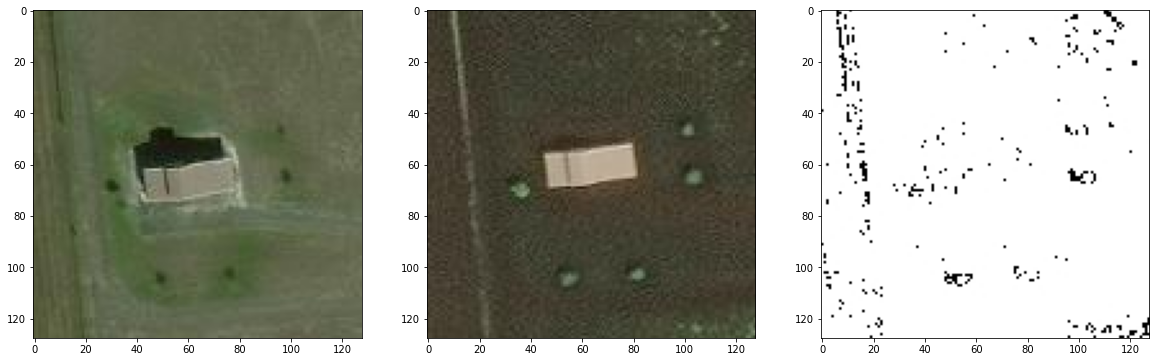

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


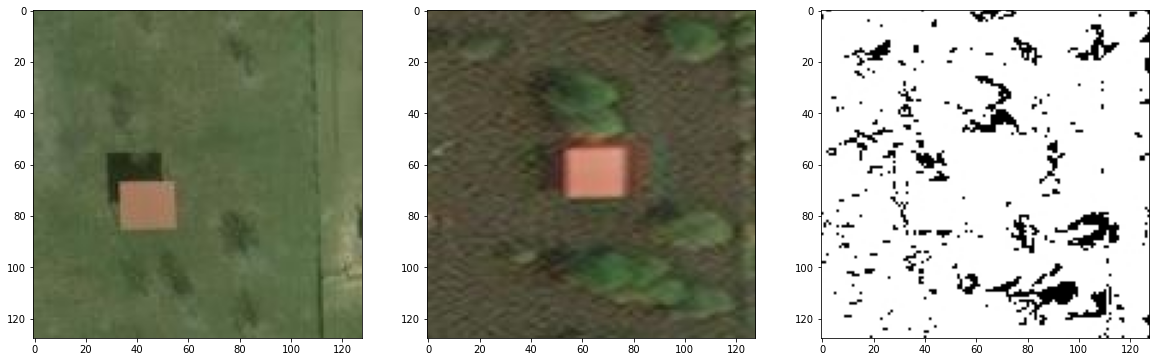

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


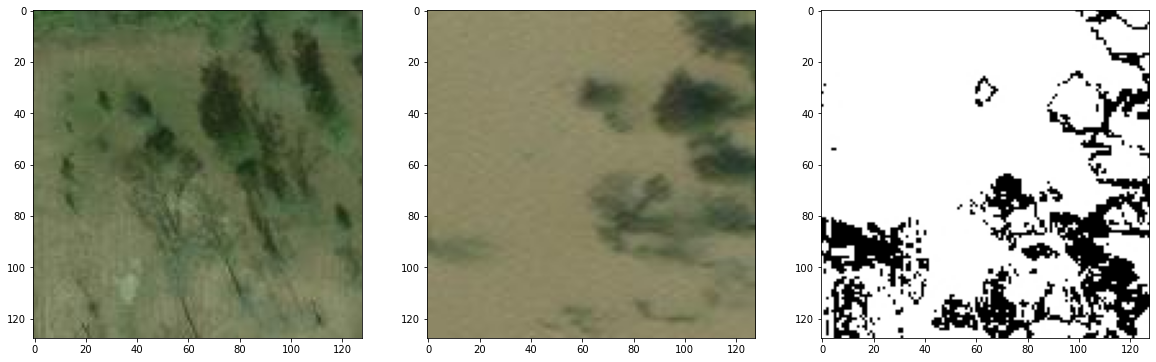

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


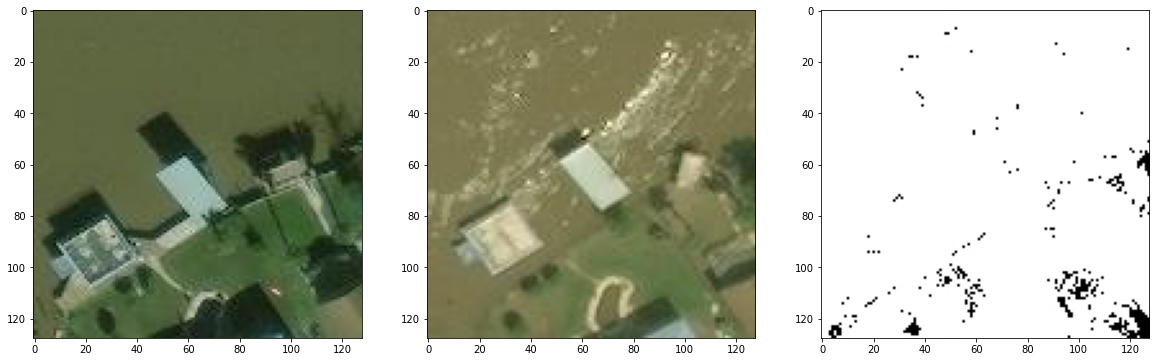

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


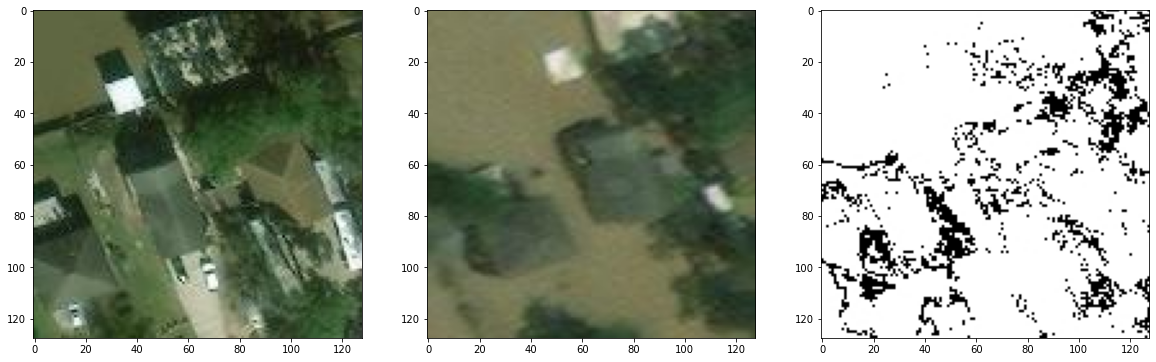

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


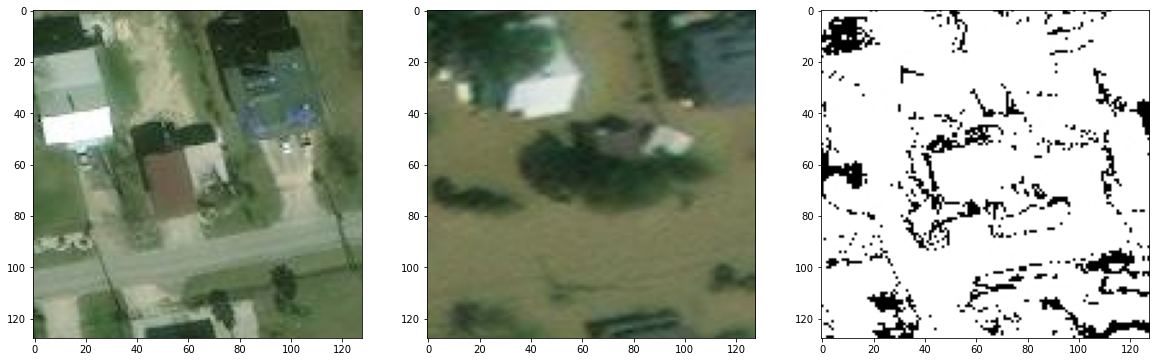

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


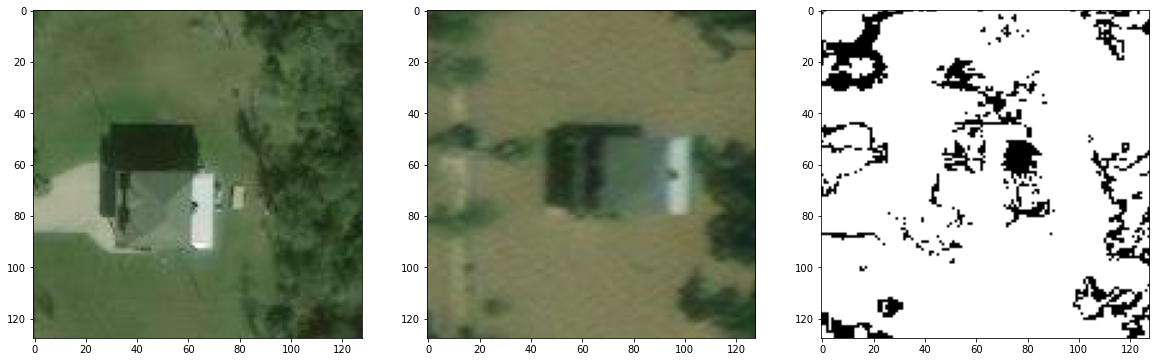

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


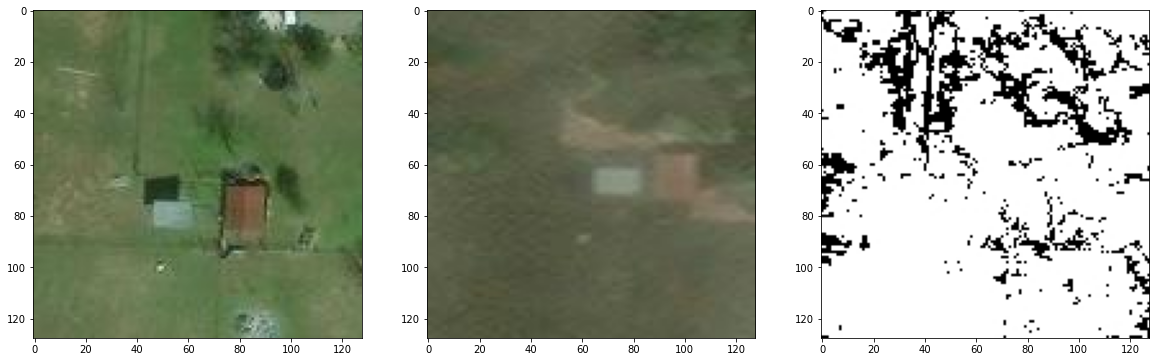

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


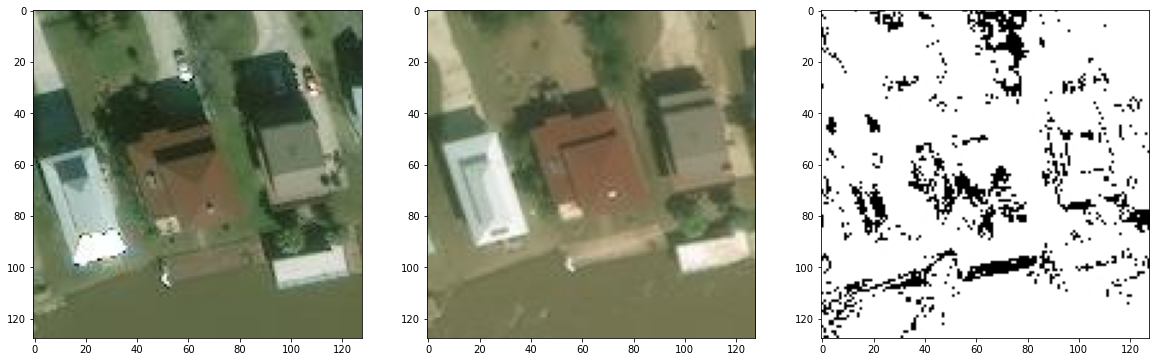

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [15]:
for i in range (1,10):
    imgT1 = cv2.imread(df_pair_train['NO_DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    imgT2 = cv2.imread(df_pair_train['DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    maskT = cv2.imread(df_pair_train['MASK'][i], cv2.IMREAD_UNCHANGED)
    
    plt.figure(figsize=(20,30))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(imgT1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(imgT2, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(maskT, cv2.COLOR_BGR2RGB))
    plt.show()
    print(imgT1.shape)
    print(imgT2.shape)
    print(maskT.shape)
    

## MOSTRAR IMÁGENES DE TEST

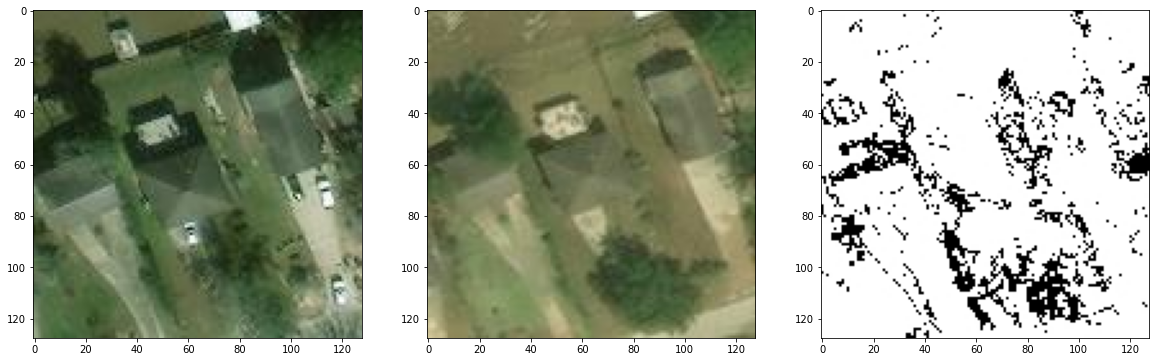

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [16]:
for i in range (1,2):
    imgt1 = cv2.imread(df_pair_test['NO_DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    imgt2 = cv2.imread(df_pair_test['DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    maskt = cv2.imread(df_pair_test['MASK'][i], cv2.IMREAD_UNCHANGED)
    
    plt.figure(figsize=(20,30))
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(imgt1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,2)
    plt.imshow(cv2.cvtColor(imgt2, cv2.COLOR_BGR2RGB))
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(maskt, cv2.COLOR_BGR2RGB))
    plt.show()
    print(imgT1.shape)
    print(imgT2.shape)
    print(maskT.shape)

# PREPROCESAMIENTO DE IMÁGENES 

In [17]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3
#inputShape= (IMG_WIDTH,IMG_HEIGHT ,IMG_CHANNELS)

In [18]:
# alamcenar imágenes en arrays de numpy para train
ND_train=[]
D_train=[]
Mask_train=[]
ND_test=[]
D_test=[]
Mask_test=[]
for i in range(len(df_pair_train)):
    img1 = cv2.imread(df_pair_train['DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    img1= cv2.resize(img1,(IMG_WIDTH,IMG_HEIGHT))
    img_D= img1.astype('float')/255
    D_train.append(img_D)
    
    img2 = cv2.imread(df_pair_train['NO_DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    img2= cv2.resize(img2,(IMG_WIDTH,IMG_HEIGHT))
    img_ND=img2.astype('float')/255
    ND_train.append(img_ND)
    
    img3 = cv2.imread(df_pair_train['MASK'][i], cv2.IMREAD_UNCHANGED)
    img3= cv2.resize(img3,(IMG_WIDTH,IMG_HEIGHT))
    img_Mask=img2.astype('float')/255
    Mask_train.append(img_Mask)

for i in range(len(df_pair_test)):
    img4 = cv2.imread(df_pair_test['NO_DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    img4= cv2.resize(img4,(IMG_WIDTH,IMG_HEIGHT))
    imgt_ND=img2.astype('float')/255
    ND_test.append(imgt_ND)
    
    img5 = cv2.imread(df_pair_test['DAMAGE'][i], cv2.IMREAD_UNCHANGED)
    img5= cv2.resize(img5,(IMG_WIDTH,IMG_HEIGHT))
    imgt_D= img1.astype('float')/255
    D_test.append(imgt_D)
    
    img6 = cv2.imread(df_pair_test['MASK'][i], cv2.IMREAD_UNCHANGED)
    img6= cv2.resize(img6,(IMG_WIDTH,IMG_HEIGHT))
    imgt_Mask=img2.astype('float')/255
    Mask_test.append(imgt_Mask)

## CARACTERPISTICAS DE LAS IMÁGNES DEPUÉS DE PROCESAMIENTO.

In [19]:
#ALMACENAR IMÁGNES EN ARREGLOS NUMPY

#### TRAIN
l_train_ND = np.array(ND_train) #damage
r_train_D = np.array(D_train) # no damage
mask= np.array(Mask_train)
#mask1= np.where(mask0>0.5, 1, 0)
#mask=mask1.astype('float64')
print("FORMATO Y FORMA PARA TRAIN: NO_DAMAGE, DAMAGE, MASK ")
print("Formato:", type(l_train_ND),',', type(r_train_D),',',type(mask))
print("Forma:",l_train_ND.shape,',', r_train_D.shape,',',mask.shape)
print("VALORES DE PIXELES PARA TRAIN: MIN, MAX ")
print("No_damage:", np.min(l_train_ND[1][:,:,:]),",", np.max(l_train_ND[1][:,:,:]))
print("Damage:", np.min(r_train_D[1][:,:,:]), ",",np.max(r_train_D[1][:,:,:]))
print("Mask:", np.min(mask[1][:,:,:]), ",",np.max(mask[1][:,:,:]))

#### TEST
l_test_ND = np.array(ND_test) #damage
r_test_D = np.array(D_test) # no damage
mask_test= np.array(Mask_test)
#mask_test1=np.where(mask_test0>0.5, 1, 0)
#mask_test=mask_test1.astype('float64')
print("FORMATO Y FORMA PARA TEST: NO_DAMAGE, DAMAGE, MASK ")
print("Formato:", type(l_test_ND),',', type(r_test_D),',',type(mask_test))
print("Forma:",l_test_ND.shape,',', r_test_D.shape,',',mask_test.shape)
print("VALORES DE PIXELES PARA TRAIN: MIN, MAX ")
print("No_damage:", np.min(l_test_ND[1][:,:,:]),",", np.max(l_test_ND[1][:,:,:]))
print("Damage:", np.min(r_test_D[1][:,:,:]), ",",np.max(r_test_D[1][:,:,:]))
print("Mask:", np.min(mask_test[1][:,:,:]), ",",np.max(mask_test[1][:,:,:]))

FORMATO Y FORMA PARA TRAIN: NO_DAMAGE, DAMAGE, MASK 
Formato: <class 'numpy.ndarray'> , <class 'numpy.ndarray'> , <class 'numpy.ndarray'>
Forma: (80, 128, 128, 3) , (80, 128, 128, 3) , (80, 128, 128, 3)
VALORES DE PIXELES PARA TRAIN: MIN, MAX 
No_damage: 0.0 , 0.7843137254901961
Damage: 0.023529411764705882 , 0.8862745098039215
Mask: 0.0 , 0.7843137254901961
FORMATO Y FORMA PARA TEST: NO_DAMAGE, DAMAGE, MASK 
Formato: <class 'numpy.ndarray'> , <class 'numpy.ndarray'> , <class 'numpy.ndarray'>
Forma: (20, 128, 128, 3) , (20, 128, 128, 3) , (20, 128, 128, 3)
VALORES DE PIXELES PARA TRAIN: MIN, MAX 
No_damage: 0.0 , 0.9098039215686274
Damage: 0.0 , 0.9882352941176471
Mask: 0.0 , 0.9098039215686274


# SIAMESE CONVOLUTIONAL NEURAL NETWORK

In [21]:
import tensorflow as tf
# problemas de keras y tf se soluciona usando tensorflow.keras. en lugar de keras.
#import keras
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model #load_model
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D, concatenate#LeakyReLU
from tensorflow.keras.layers import Activation, Input, Lambda#X
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
# from tensorflow.keras.utils import np_utils SE USA AHORA 
#keras.utils.np_utils.to_categorical -> keras.utils.to_categorical



import random
print ("La versión de keras es:", keras.__version__)
print ("La versión de tensorflow es:", tf.__version__)

La versión de keras es: 2.6.0
La versión de tensorflow es: 2.6.0


# SIAMESE NEURAL NETWORK

## MODELO UNO

### FEATURE EXTRACTOR: SIAMESE LEGS

In [61]:
left_input = Input((IMG_WIDTH ,IMG_HEIGHT,IMG_CHANNELS),name = 'Img_Damage')
right_input = Input((IMG_WIDTH ,IMG_HEIGHT,IMG_CHANNELS),name = 'Img_No_Damage')

# ENCODER
Enco= keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu', 
                        input_shape=(IMG_WIDTH,IMG_HEIGHT ,IMG_CHANNELS),
                        name="S_Conv_1"),
    keras.layers.MaxPool2D(pool_size=(2,2),name="S_Max_pool_1"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(filters=128, kernel_size=(3,3),
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="S_Conv_2"),
    keras.layers.MaxPool2D(pool_size=(2,2),name="S_Max_pool_2"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="S_Conv_3"),
    keras.layers.MaxPool2D(pool_size=(2,2),name="S_Max_pool_3"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Conv2D(filters=512, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="S_Conv_4"),
    keras.layers.MaxPool2D(pool_size=(2,2),name="S_Max_pool_4"),
    keras.layers.Dropout(0.5),
],name="ENCODER")

#FEATURE VECTORS FOR 2 IMAGE INPUTS
encoded_l = Enco(left_input)
encoded_r = Enco(right_input)

# DECODER
Deco= keras.models.Sequential([
    keras.layers.Conv2DTranspose(filters=512, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu', 
                        name= "DeConv_1"),
    keras.layers.UpSampling2D((2),name="UpSamp_1"),
    
    keras.layers.Conv2DTranspose(filters=256, kernel_size=(3,3),
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="DeConv_2"),
    keras.layers.UpSampling2D((2),name="UpSamp_2"),
    
    keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="DeConv_3"),
    keras.layers.UpSampling2D((2),name="UpSamp_3"),
    
    keras.layers.Conv2DTranspose(filters=64, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='relu',
                        name="DeConv_4"),
    keras.layers.UpSampling2D((2),name="UpSamp_4"),
    
], name= "DECODER")

decoder_l= Deco(encoded_l)  
decoder_r= Deco(encoded_r)

#LAYER TO COMPUTE THE ABSOLUTE DIFFERENCE BETWEEN THE ENCODINGS
L1_layer= Lambda(lambda tensor: K.abs(tensor[0] - tensor[1]), name= "DISTANCIA")
#Lambda(lambda tensor: K.abs(tensor[0] - tensor[1]), name= "DISTANCIA")#
#Lambda(lambda tensors:((K.square(tensors[0]) - K.square(tensors[1])))) 

L1_distance = L1_layer([decoder_l, decoder_r])
Norm_layer=keras.layers.BatchNormalization()(L1_distance)# 

Predi= keras.layers.Conv2D(filters=3, kernel_size=(3,3), 
                        strides=(1,1), padding= "same",
                        activation='sigmoid', 
                        name="img_Conv_1") (Norm_layer)
                           
Modelo = Model(inputs=[left_input,right_input], outputs=[Predi],name = 'G3')

In [63]:
#Deco.summary()

In [64]:
#Deco.summary()

In [65]:
#Modelo.summary()

In [66]:
def loss(margin=1):
    def contrastive_loss(y_true, y_pred):
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - (y_pred), 0))
        return tf.math.reduce_mean(
            (1 - y_true) * square_pred + (y_true) * margin_square)
    return contrastive_loss

In [67]:
optimizer = Adam(1e-3, decay=2.5e-4)
Modelo.compile(optimizer='adam', loss = loss(margin=1) , metrics = ['accuracy']) #binary_crossentropy, loss(margin=1)

In [68]:
hist = Modelo.fit([l_train_ND,r_train_D],mask,
          batch_size=32,
          epochs=15,
          verbose=1,
          validation_split=0.1,)

Epoch 1/15
3/3 [==============================] - 14s 4s/step - loss: 0.2741 - accuracy: 0.3021 - val_loss: 0.2492 - val_accuracy: 0.5825
Epoch 2/15
3/3 [==============================] - 13s 4s/step - loss: 0.2483 - accuracy: 0.4366 - val_loss: 0.2481 - val_accuracy: 0.5263
Epoch 3/15
3/3 [==============================] - 13s 4s/step - loss: 0.2465 - accuracy: 0.3418 - val_loss: 0.2475 - val_accuracy: 0.7257
Epoch 4/15
3/3 [==============================] - 15s 4s/step - loss: 0.2447 - accuracy: 0.4469 - val_loss: 0.2499 - val_accuracy: 0.7684
Epoch 5/15
3/3 [==============================] - 14s 4s/step - loss: 0.2427 - accuracy: 0.4685 - val_loss: 0.2553 - val_accuracy: 0.3748
Epoch 6/15
3/3 [==============================] - 14s 4s/step - loss: 0.2403 - accuracy: 0.6737 - val_loss: 0.2551 - val_accuracy: 0.3408
Epoch 7/15
3/3 [==============================] - 14s 4s/step - loss: 0.2379 - accuracy: 0.6860 - val_loss: 0.2498 - val_accuracy: 0.5455
Epoch 8/15
3/3 [==================

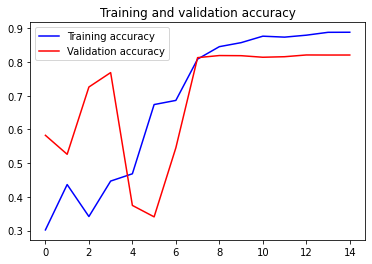

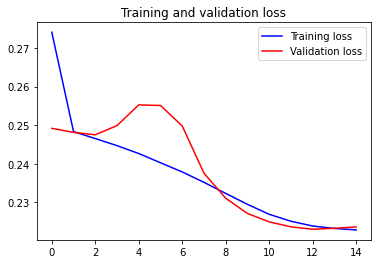

In [69]:
plt.figure(1)
plt.plot(hist.history['accuracy'], color='b', label = 'Training accuracy')
plt.plot(hist.history['val_accuracy'], color='r', label='Validation accuracy')
plt.title('Training and validation accuracy')
#plt.set(xlim=(0, 20), ylim=(0, 1))
plt.legend()

plt.show()
plt.figure(2)
plt.plot(hist.history['loss'], color='b', label = 'Training loss')
plt.plot(hist.history['val_loss'], color='r', label='Validation loss')
plt.title('Training and validation loss')
#plt.set(xlim=(0, 20), ylim=(0, 1))
plt.legend() 


# EVALUACIÓN DEL MODELO

## EVALUACIÓN

In [70]:
score = Modelo.evaluate([l_test_ND,r_test_D],mask_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

1/1 [==============================] - 1s 977ms/step - loss: 0.2146 - accuracy: 0.8068
Test loss: 0.21456007659435272
Test accuracy: 0.80682373046875


## PREDICTION

## damage_df

In [93]:
Input_path='C:\\Users\gabo2\Desktop\Hurrican\DATASET/'
#Input_path='C:\\Users\gabo2\Desktop\Hurrican\DATASET_2/TEST/'
#damage_df = pd.DataFrame({'path': list(Path(Input_path).glob('A/*.jpg'))})  #A.jpg
damage_df = pd.DataFrame({'path': list(Path(Input_path).glob('DAMAGE/*.jpeg'))}) #crear tabla 
damage_df['name'] = damage_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
damage_df['path'] = damage_df['path'].map(lambda x: str(x)) # convert the path back to a string

#damage_df.head(len(damage_df))

## no_damage_df

In [94]:
#damage_df = pd.DataFrame({'path': list(Path(Input_path).glob('B/*.jpg'))})  #A.jpg
no_damage_df = pd.DataFrame({'path': list(Path(Input_path).glob('NO_DAMAGE/*.jpeg'))}) #crear tabla 
no_damage_df['name'] = no_damage_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
no_damage_df['path'] = no_damage_df['path'].map(lambda x: str(x)) # convert the path back to a string

#no_damage_df.head(len(no_damage_df))
D_pred=[]
ND_pred=[]
for i in range(50):
    img1 = cv2.imread(damage_df['path'][i], cv2.IMREAD_UNCHANGED)
    img1= cv2.resize(img1,(IMG_WIDTH,IMG_HEIGHT))
    img_D= img1.astype('float')/255
    D_pred.append(img_D)
    
    img2 = cv2.imread(no_damage_df['path'][i], cv2.IMREAD_UNCHANGED)
    img2= cv2.resize(img2,(IMG_WIDTH,IMG_HEIGHT))
    img_ND=img2.astype('float')/255
    ND_pred.append(img_ND)

In [98]:
l_pred_ND = np.array(ND_pred) #damage
r_pred_D = np.array(D_pred) # no damage

print("El foramto de l_test_ND es:", type(l_pred_ND))
print("La forma de l_test_ND es:",l_pred_ND.shape)

print("El foramto de r_test_D es:", type(r_pred_D))
print("La forma de r_test_D es:",r_pred_D.shape)



El foramto de l_test_ND es: <class 'numpy.ndarray'>
La forma de l_test_ND es: (50, 128, 128, 3)
El foramto de r_test_D es: <class 'numpy.ndarray'>
La forma de r_test_D es: (50, 128, 128, 3)


In [74]:
prediction= Modelo.predict([l_pred_ND,r_pred_D])
#predi=np.squeeze(prediction)

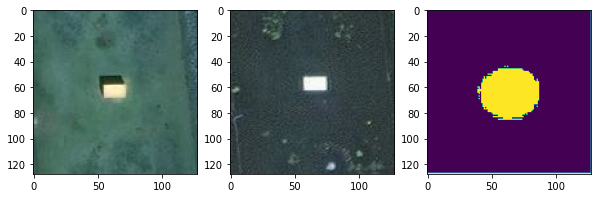

0.3566461205482483
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


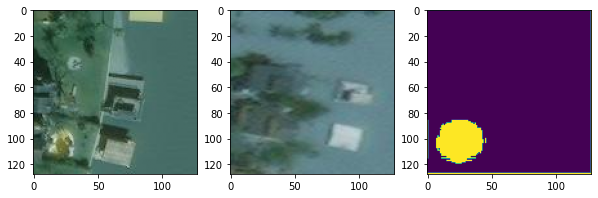

0.3585948348045349
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


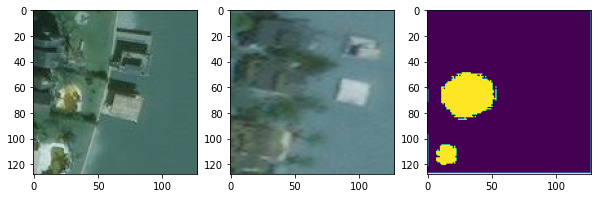

0.3583598732948303
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


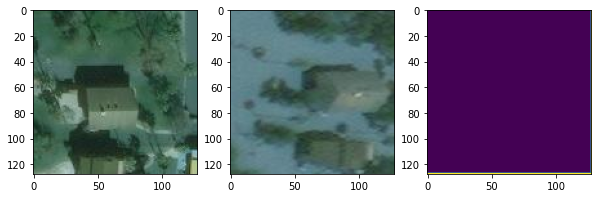

0.36130377650260925
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


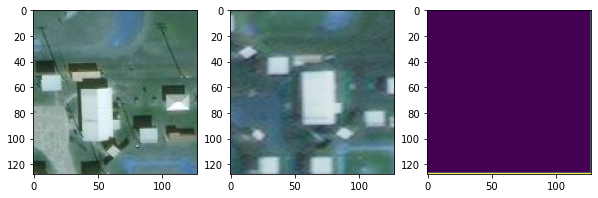

0.3602716624736786
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [76]:
for i in range (5):
    t= (np.max(prediction[i]) + np.min(prediction[i]))/2
    bi = np.where(prediction[i]>t, 1, 0)
    result=bi.astype('float32') # funciona con float32 y binarización previa de imágenes
    
    plt.figure(figsize=(10,25))
    plt.subplot(1,3,1)
    plt.imshow(l_pred_ND[i])
    plt.subplot(1,3,2)
    plt.imshow(r_pred_D[i])
    plt.subplot(1,3,3)
    plt.imshow(result[:,:,1])#[:,:,1]
    plt.show()
    print(t)
    print(l_pred_ND[i].shape)
    print(r_pred_D[i].shape)
    print(prediction[i].shape)

In [ ]:
#Modelo.save('Modelo_2_AVK.h5')

# DATASET NUEVO

In [125]:
#Input_path='C:\\Users\gabo2\Desktop\Hurrican\DATASET/'
Input_path='C:\\Users\gabo2\Desktop\Hurrican\DATASET_2/PRUEBA/'
p_df = pd.DataFrame({'path': list(Path(Input_path).glob('A/*.jpg'))})  #A.jpg
#p_df = pd.DataFrame({'path': list(Path(Input_path).glob('DAMAGE/*.jpeg'))}) #crear tabla 
p_df['name'] = p_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
p_df['path'] = p_df['path'].map(lambda x: str(x)) # convert the path back to a string

p_df.head(len(p_df))

path name
0  C:\Users\gabo2\Desktop\Hurrican\DATASET_2\PRUE...  im1

In [127]:
print(p_df['path'][0])

C:\Users\gabo2\Desktop\Hurrican\DATASET_2\PRUEBA\A\im1.jpg


In [130]:
nd_p_df = pd.DataFrame({'path': list(Path(Input_path).glob('B/*.jpg'))})  #A.jpg
nd_p_df['name'] = nd_p_df['path'].map(lambda x: x.stem) #deveuelve componenete fianl de una lista sin sufijo nombre de imagen
nd_p_df['path'] = nd_p_df['path'].map(lambda x: str(x)) # convert the path back to a string

#no_damage_df.head(len(no_damage_df))
D_pred2=[]
ND_pred2=[]
for i in range(1):
    img1 = cv2.imread(p_df['path'][i], cv2.IMREAD_UNCHANGED)
    img1= cv2.resize(img1,(IMG_WIDTH,IMG_HEIGHT))
    img_D= img1.astype('float')/255
    D_pred2.append(img_D)
    
    img2 = cv2.imread(nd_p_df['path'][i], cv2.IMREAD_UNCHANGED)
    img2= cv2.resize(img2,(IMG_WIDTH,IMG_HEIGHT))
    img_ND=img2.astype('float')/255
    ND_pred2.append(img_ND)

In [136]:
img1 = cv2.imread(p_df['path'][i], cv2.IMREAD_UNCHANGED)

In [138]:
img1.shape

(724, 1048, 3)

In [131]:
l_pred_ND2 = np.array(ND_pred2) #damage
r_pred_D2 = np.array(D_pred2) # no damage

print("El foramto de l_test_ND es:", type(l_pred_ND2))
print("La forma de l_test_ND es:",l_pred_ND.shape)

print("El foramto de r_test_D es:", type(r_pred_D2))
print("La forma de r_test_D es:",r_pred_D.shape)



El foramto de l_test_ND es: <class 'numpy.ndarray'>
La forma de l_test_ND es: (50, 128, 128, 3)
El foramto de r_test_D es: <class 'numpy.ndarray'>
La forma de r_test_D es: (50, 128, 128, 3)


In [132]:
prediction2= Modelo.predict([l_pred_ND2,r_pred_D2])

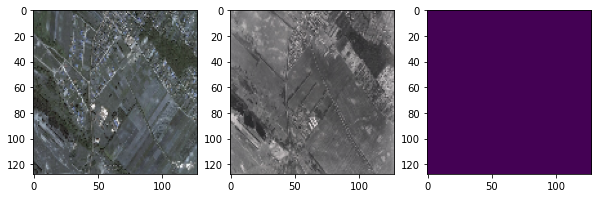

0.3603191673755646
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


In [140]:
for i in range (1):
    t= (np.max(prediction2[i]) + np.min(prediction2[i]))/2
    bi = np.where(prediction2[i]>0.2, 1, 0)
    result=bi.astype('float32') # funciona con float32 y binarización previa de imágenes
    
    plt.figure(figsize=(10,25))
    plt.subplot(1,3,1)
    plt.imshow(l_pred_ND2[i])
    plt.subplot(1,3,2)
    plt.imshow(r_pred_D2[i])
    plt.subplot(1,3,3)
    plt.imshow(result[:,:,1])#[:,:,1]
    plt.show()
    print(t)
    print(l_pred_ND2[i].shape)
    print(r_pred_D2[i].shape)
    print(prediction2[i].shape)

In [143]:
Modelo.save('Mod_fin.h5')
